In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline 

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

#set pd for 2 decimal float 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
end = datetime.now()
start=datetime(end.year - 1, end.month, end.day)
#start = '1/1/2017'
symbol=input('Please Enter Stock Symbol : ')
df=DataReader(symbol, 'yahoo', start, end)
df.drop('Adj Close', axis=1,inplace=True)
print('Done')


Please Enter Stock Symbol :  AAPL


Done


In [4]:
#Data Cleaning
df.reset_index(inplace=True)
df = df[['Date', 'Open', 'High', 'Low', 'Close','Volume']]
df.tail(10)

,Date,Open,High,Low,Close,Volume
241,2021-03-22,120.33,123.87,120.26,123.39,111912300.00
242,2021-03-23,123.33,124.24,122.14,122.54,95467100.00
243,2021-03-24,122.82,122.90,120.07,120.09,88530500.00
244,2021-03-25,119.54,121.66,119.00,120.59,98844700.00
245,2021-03-26,120.35,121.48,118.92,121.21,93958900.00
246,2021-03-29,121.65,122.58,120.73,121.39,80819200.00
247,2021-03-30,120.11,120.40,118.86,119.90,85671900.00
248,2021-03-31,121.65,123.52,121.15,122.15,118323800.00
249,2021-04-01,123.66,124.18,122.49,123.00,74957400.00
250,2021-04-05,123.66,125.12,123.07,124.78,14852815.00


#Dont run This only if you want to update data 

In [8]:
#Saving Data
df.to_csv('./Saved/'+symbol+'.csv',index=False)

In [9]:
#Add calulated Columns 
# add calculated col Candle stick 
df['Candle'] = df.Close - df.Open
df['Ch%']=(df.Candle/df.Open)*100
#Highs percent of open price 
df['H%']=((df.High-df.Open)/df.Open)*100

#lows percent of open price
df['L%']=((df.Open-df.Low)/df.Open)*100

#High - low value 
df['HL']=df.High-df.Low
df['HLCH%']=(df.HL/df.Open)*100

#Low to close 
df['LtC']=df.Close-df.Low
df['LtC%']=(df.LtC/df.Open)*100

# Converte date col to date type then get day name by date value 
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()
#Calculate mean , median 

# apply up trend if Candle is postive other is negative 
df['UPTrend'] = np.where(df['Candle']>0, True, False)

#Filter unwanted column
FilteredDf= df#[['Date','Open','Candle','Ch%','H%','L%','HL','HLCH%','LtC%','Day','UPTrend']]
uptrend= FilteredDf.loc[df['UPTrend'] == True]
downtrend= FilteredDf.loc[df['UPTrend'] == False]


df['Date'].iloc[0]
print("Data from :")
print(df['Date'].iloc[0])
print("Data to :")
print(df['Date'].iloc[-1])
df.describe()
#Monday=df.loc[df['Day'] == 'Monday']
#trend count calculate the up trend squences and down trend squences
#Monday.describe()

Data from :
2020-03-30 00:00:00
Data to :
2021-03-29 00:00:00


,Open,High,Low,Close,Volume,Candle,Ch%,H%,L%,HL,HLCH%,LtC,LtC%
count,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00
mean,108.29,109.70,106.71,108.25,136772701.52,-0.04,0.02,1.33,1.41,2.99,2.74,1.53,1.43
std,21.63,21.78,21.12,21.41,52376947.28,1.97,1.79,1.10,1.31,1.68,1.34,1.40,1.23
min,60.08,61.29,59.22,60.23,33750482.00,-6.87,-5.71,0.01,0.01,0.75,0.94,0.01,0.01
25%,91.00,91.75,89.57,91.03,99048625.00,-1.21,-1.05,0.49,0.49,1.79,1.71,0.47,0.46
50%,115.55,116.97,113.94,115.45,125168200.00,0.12,0.11,1.04,1.02,2.61,2.50,1.19,1.23
75%,124.12,125.43,121.91,124.08,164597200.00,1.09,1.15,2.00,1.92,3.70,3.35,2.16,2.01
max,143.60,145.09,141.37,143.16,374336800.00,5.54,5.30,5.40,7.70,12.81,10.67,10.07,8.39


In [17]:
#Days
Monday=df.loc[df['Day'] == 'Monday']
Tuesday=df.loc[df['Day'] == 'Tuesday']
Wednesday=df.loc[df['Day'] == 'Wednesday']
Thursday=df.loc[df['Day'] == 'Thursday']
Friday=df.loc[df['Day'] == 'Friday']

#TimeFrame
#Spicific Date 
spec_date=df.loc[df['Date']>='2021-02-10']

#last 5 days 
LastW=df.set_index("Date").last("1W")

#Month
Last1M=df.set_index("Date").last("1M")

#6month
Last6M=df.set_index("Date").last("6M")

#Year Start
thisY=df.set_index("Date").last("1Y")
spec_date.describe()


,Open,High,Low,Close,Volume,Candle,Ch%,H%,L%,HL,HLCH%,LtC,LtC%
count,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00
mean,124.94,126.28,122.96,124.54,110307966.12,-0.40,-0.31,1.08,1.58,3.31,2.66,1.58,1.27
std,5.05,4.78,5.06,5.03,33889470.35,1.98,1.60,0.85,1.04,1.38,1.13,1.65,1.34
min,119.03,121.00,116.21,116.36,33750482.00,-4.57,-3.78,0.06,0.06,1.75,1.37,0.02,0.02
25%,121.41,122.58,119.45,121.03,92403800.00,-1.71,-1.41,0.39,0.82,2.56,1.93,0.40,0.31
50%,123.33,124.85,121.20,122.54,103916400.00,-0.41,-0.31,0.76,1.38,2.86,2.33,1.07,0.82
75%,128.01,128.72,125.01,126.00,121229700.00,0.71,0.57,1.46,2.17,3.71,3.00,2.30,1.90
max,136.48,136.99,134.40,135.39,185023200.00,4.04,3.26,3.38,4.34,8.32,6.72,7.47,6.04


In [89]:
#if previous cahnge is negative 
def trendCount(df):
    d= {'Date': [], 'Trend': [],'Ch%': []}    
    trendCount=[]
    ncount=0
    pcount=0
    for index, row in df.iterrows():
        if row['Candle']<0:
            ncount=ncount-1
            d['Date'].append(row['Date'])
            d['Trend'].append(ncount)
            d['Ch%'].append(row['Candle'])
            pcount=0
        if row['Candle']>=0:
            pcount=pcount+1
            d['Date'].append(row['Date'])
            d['Trend'].append(pcount)
            d['Ch%'].append(row['Candle'])
            ncount=0
    return d

resultdf=pd.DataFrame(trendCount(df))
resultdf.tail(30)

,Date,Trend,Ch%
222,2021-02-09,-1,-0.61
223,2021-02-10,-2,-1.09
224,2021-02-11,-3,-0.77
225,2021-02-12,1,1.02
226,2021-02-16,-1,-2.30
227,2021-02-17,-2,-0.41
228,2021-02-18,1,0.51
229,2021-02-19,-1,-0.37
230,2021-02-22,-2,-2.01
231,2021-02-23,1,2.10


table = pd.pivot_table(Last6M, values=['Ch%','H%','L%','HLCH%','LtC%'], index=['Day','UPTrend'],
                    aggfunc={'Ch%': [min,max,np.mean,np.median],
                            'H%': [min,max,np.mean,np.median],
                            'L%': [min,max,np.mean,np.median],
                            'HLCH%':[min,max,np.mean,np.median],
                            'LtC%':[min,max,np.mean,np.median]})
table

Last6M.describe()
#Last6M[['Open']].mode()
Last6M



#Described=Last6M'''.loc[Last6M['UPTrend'] == True].loc[Last6M['Day'] == 'Friday' ]'''.describe()
Described=Last6M.describe()

Described


In [18]:
import pandas as pd
import numpy as np
#thisY=df.set_index("Date").last("6M")
var=spec_date
Described=var.describe()
DescribedUp=var.loc[var['UPTrend'] == True].describe()
DescribedDown=var.loc[var['UPTrend'] == False].describe()
def PrintHL(Described):
    print('#High')
    print('Max {:.2f}'.format(Described['H%'].iloc[7]),' :',float(float(priceToday)*((Described['H%'].iloc[7]/100)+1)))
    print('Mid {:.2f}'.format(Described['H%'].iloc[5]),' :',float(float(priceToday)*((Described['H%'].iloc[5]/100)+1)))
    print('Mean {:.2f}'.format(Described['H%'].iloc[1]),' :',float(float(priceToday)*((Described['H%'].iloc[1]/100)+1)))
    print('Min {:.2f}'.format(Described['H%'].iloc[3]),' :' ,float(float(priceToday)*((Described['H%'].iloc[3]/100)+1)))

    print('#Low')
    print('Min {:.2f}'.format(Described['L%'].iloc[3]),' : ',float(float(priceToday)*(1-(Described['L%'].iloc[3]/100))))
    print('Mean {:.2f}'.format(Described['L%'].iloc[1]),' : ',float(float(priceToday)*(1-(Described['L%'].iloc[1]/100))))
    print('Mid {:.2f}'.format(Described['L%'].iloc[5]),' : ',float(float(priceToday)*(1-(Described['L%'].iloc[5]/100))))
    print('Max {:.2f}'.format(Described['L%'].iloc[7]),' : ', float(float(priceToday)*(1-(Described['L%'].iloc[7]/100))))
    
priceToday=float(input("Please Enter Price Today "))
print('Open Price= ',priceToday)
print('General')
PrintHL(Described)
print('#################################################')
print('UpTrend')
PrintHL(DescribedUp)
print('#################################################')
print('DownTrend')
PrintHL(DescribedDown)


Please Enter Price Today 121.65
Open Price=  121.65
General
#High
Max 3.38  : 125.7590669666637
Mid 0.76  : 122.58000029351062
Mean 1.08  : 122.96173540589204
Min 0.06  : 121.7204164628618
#Low
Min 0.06  :  121.57923242129323
Mean 1.58  :  119.72214972699112
Mid 1.38  :  119.97307689137945
Max 4.34  :  116.37155120518972
#################################################
UpTrend
#High
Max 3.38  : 125.7590669666637
Mid 1.37  : 123.31365463764813
Mean 1.59  : 123.58393094051097
Min 0.50  : 122.2536689973752
#Low
Min 0.06  :  121.57923242129323
Mean 1.23  :  120.14795097381261
Mid 0.92  :  120.52758297042159
Max 4.34  :  116.37155120518972
#################################################
DownTrend
#High
Max 1.84  : 123.89267287776615
Mid 0.55  : 122.31513201112496
Mean 0.70  : 122.50327553827809
Min 0.06  : 121.7204164628618
#Low
Min 0.67  :  120.8300003154612
Mean 1.84  :  119.4084014398595
Mid 1.84  :  119.41073085071541
Max 3.90  :  116.90189657612233


In [15]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
#var=df["H%"]

var=pd.DataFrame(trendCount(thisY))#.loc[df['Day'] == 'Monday']
plt.pyplot.hist(var)

# set x/y labels and plot title
plt.pyplot.xlabel("data")
plt.pyplot.ylabel("Counts")
plt.pyplot.title("Counts")
thisY.describe()


NameError: name 'trendCount' is not defined

In [62]:
Last6M.describe()

,Open,High,Low,Close,Volume,Candle,Ch%,H%,L%,HL,HLCH%,LtC,LtC%
count,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00
mean,3194.25,3228.23,3151.54,3187.91,4099237.45,-6.34,-0.19,1.07,1.33,76.69,2.40,36.38,1.14
std,96.24,97.93,96.33,98.35,1343975.32,47.18,1.47,0.87,1.10,34.05,1.05,28.65,0.90
min,3005.00,3009.00,2881.00,2951.95,1451917.00,-121.60,-3.85,0.00,0.01,25.96,0.81,0.31,0.01
25%,3127.03,3149.56,3087.12,3117.02,3070919.00,-34.44,-1.07,0.42,0.49,53.48,1.68,14.47,0.44
50%,3188.50,3210.13,3144.02,3185.07,3808676.00,-4.54,-0.15,0.77,1.03,67.61,2.10,31.65,0.99
75%,3250.00,3292.00,3211.30,3262.13,4708887.00,18.25,0.58,1.67,1.79,91.77,2.91,53.45,1.65
max,3467.99,3496.24,3424.22,3443.63,8396081.00,100.52,3.10,4.37,6.04,239.66,7.13,119.46,3.98


,Open,High,Low,Close,Volume,Candle,Ch%,H%,L%,HL,HLCH%,LtC,LtC%
count,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
mean,122.28,124.51,121.26,123.71,111741045.00,1.43,1.17,1.83,0.83,3.25,2.66,2.45,2.00
std,6.87,7.03,6.79,7.08,33011111.24,1.13,0.92,0.94,0.74,1.24,0.99,1.25,1.00
min,109.66,111.49,108.73,110.44,46691300.00,0.01,0.01,0.49,0.05,1.27,1.09,0.31,0.26
25%,116.90,119.04,116.39,118.36,91076575.00,0.45,0.39,1.01,0.32,2.45,1.99,1.80,1.50
50%,120.74,123.42,119.65,122.90,108601300.00,1.07,0.90,1.74,0.66,3.17,2.69,2.29,1.90
75%,127.92,128.96,126.88,128.37,124961425.00,2.17,1.82,2.40,1.15,3.73,3.01,3.10,2.46
max,136.30,139.85,135.02,139.07,240226800.00,4.34,3.61,4.39,4.34,8.32,6.72,7.47,6.04


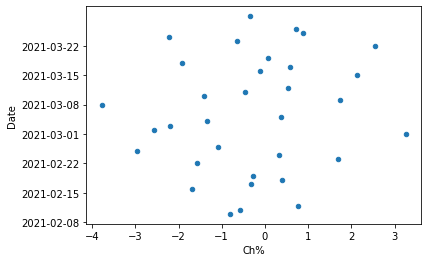

In [16]:
#thisY.plot.scatter(x='Date',y='H%')
var=spec_date.reset_index()
ax1 = var.plot.scatter(x='Ch%',y='Date')
#ax2 = var.plot.scatter(x='L%',y='Open')
Last6M.loc[Last6M['UPTrend'] == True].describe()

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
var=df["L%"]
plt.pyplot.hist(var)
# set x/y labels and plot title
plt.pyplot.xlabel("L%")
plt.pyplot.ylabel("count")
plt.pyplot.title("Lows")

#sns.boxplot(x="UPTrend", y="H%", data=df)
pd.DataFrame(trendCount)
sns.boxplot(x="UPTrend", y="L%", data=df)

In [57]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Candle,Ch%,H%,L%,HL,HLCH%,LtC,LtC%,UPTrend
Open,1.00,1.00,1.00,0.99,0.99,-0.19,-0.18,-0.19,-0.21,0.11,0.22,-0.08,0.01,-0.18,-0.11
High,1.00,1.00,1.00,1.00,1.00,-0.16,-0.12,-0.13,-0.13,0.07,0.26,-0.05,0.07,-0.12,-0.07
Low,1.00,1.00,1.00,1.00,1.00,-0.23,-0.10,-0.12,-0.17,0.01,0.16,-0.14,0.02,-0.17,-0.06
Close,0.99,1.00,1.00,1.00,1.00,-0.20,-0.05,-0.07,-0.12,0.01,0.20,-0.10,0.10,-0.09,-0.01
Adj Close,0.99,1.00,1.00,1.00,1.00,-0.20,-0.05,-0.07,-0.12,0.01,0.20,-0.10,0.10,-0.09,-0.01
Volume,-0.19,-0.16,-0.23,-0.20,-0.20,1.00,-0.03,-0.01,0.40,0.42,0.66,0.75,0.39,0.43,-0.04
Candle,-0.18,-0.12,-0.10,-0.05,-0.05,-0.03,1.00,0.99,0.72,-0.77,-0.16,-0.09,0.67,0.70,0.77
Ch%,-0.19,-0.13,-0.12,-0.07,-0.07,-0.01,0.99,1.00,0.75,-0.76,-0.14,-0.05,0.68,0.72,0.77
H%,-0.21,-0.13,-0.17,-0.12,-0.12,0.40,0.72,0.75,1.00,-0.41,0.39,0.50,0.66,0.71,0.58
L%,0.11,0.07,0.01,0.01,0.01,0.42,-0.77,-0.76,-0.41,1.00,0.62,0.58,-0.07,-0.10,-0.61


In [59]:
df[['Open','Ch%']].corr()

,Open,Ch%
Open,1.00,-0.19
Ch%,-0.19,1.00


<AxesSubplot:xlabel='Open', ylabel='Ch%'>

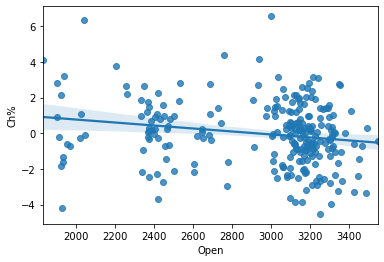

In [62]:
sns.regplot(x="Open", y="Ch%", data=df.loc(df))

In [75]:
#Pivot Table only Important informtaion
table = pd.pivot_table(uptrend, values=['Ch%','H%','L%','HLCH%','LtC%'], index=['Day','UPTrend'],
                    aggfunc={'Ch%': [max,min,np.mean,np.median],
                            'H%': [max,min,np.mean,np.median],
                            'L%': [max,min,np.mean,np.median],
                            'HLCH%':[max,min,np.mean,np.median],
                            'LtC%':[max,min,np.mean,np.median]})

The Pearson Correlation Coefficient is 0.5776523700314733  with a P-value of P = 7.90068698393629e-24


In [48]:
import yfinance as yf

tickers = yf.Tickers('msft aapl goog')
tickers.tickers.AAPL.history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-24,124.94,125.56,122.23,125.35,111039900,0,0
2021-02-25,124.68,126.46,120.54,120.99,148199500,0,0
2021-02-26,122.59,124.85,121.20,121.26,164320000,0,0
2021-03-01,123.75,127.93,122.79,127.79,115998300,0,0
2021-03-02,128.41,128.72,125.01,125.12,102015300,0,0
2021-03-03,124.81,125.71,121.84,122.06,112430400,0,0
2021-03-04,121.75,123.60,118.62,120.13,177275300,0,0
2021-03-05,120.98,121.94,117.57,121.42,153590400,0,0
2021-03-08,120.93,121.00,116.21,116.36,153918600,0,0
